Erika Veloz

Jan 15/2020

Mini Project 2- Data Analytics

In [1]:
#Environmental set up and loading of packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data Collection
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv' )
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
933493,2021-01-15,Sweetwater,Wyoming,56037.0,3262,26.0
933494,2021-01-15,Teton,Wyoming,56039.0,2605,4.0
933495,2021-01-15,Uinta,Wyoming,56041.0,1806,9.0
933496,2021-01-15,Washakie,Wyoming,56043.0,839,23.0


In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
df.shape

(933498, 6)

In [5]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [37]:
df.groupby(['state'])['cases'].count()

state
Alabama                     19951
Alaska                       7101
Arizona                      4625
Arkansas                    22324
California                  17671
Colorado                    18615
Connecticut                  2744
Delaware                     1199
District of Columbia          315
Florida                     20518
Georgia                     47609
Guam                          307
Hawaii                       1303
Idaho                       11930
Illinois                    29767
Indiana                     27450
Iowa                        28770
Kansas                      28451
Kentucky                    34612
Louisiana                   19508
Maine                        5021
Maryland                     7570
Massachusetts                4669
Michigan                    24630
Minnesota                   25379
Mississippi                 24484
Missouri                    33088
Montana                     13608
Nebraska                    24003
Nevada  

In [6]:

NY_cases_by_county= df[df["state"] == "New York"]

In [7]:
print("Total cases and Total Deaths for New York" + "\n")

Total cases and Total Deaths for New York



In [8]:
significant = ["cases","deaths"]

In [9]:
#This would print the total number of cases and deaths since the beginning of the pandemic
NY_total = NY_cases_by_county.groupby("date")[significant].sum()
print(NY_total)
print("\n\n")

              cases   deaths
date                        
2020-03-01        1      0.0
2020-03-02        1      0.0
2020-03-03        2      0.0
2020-03-04       11      0.0
2020-03-05       22      0.0
...             ...      ...
2021-01-11  1150028  39404.0
2021-01-12  1164819  39588.0
2021-01-13  1179523  39760.0
2021-01-14  1193710  39997.0
2021-01-15  1213179  40203.0

[321 rows x 2 columns]





In [10]:
#New cases and deaths per day from my selected state
dates_list =list(NY_total.index)
NY_cases_list = NY_total["cases"].tolist()
NY_deaths_list = NY_total["deaths"].tolist()

In [11]:
new_cases = np.diff(NY_cases_list).tolist()
new_deaths = np.diff(NY_deaths_list).tolist()
new_cases.insert(0,"N\A")
new_deaths.insert(0,"N\A")
#Some of the data at the beginning of the pandemic didnt have any data reported to substract with new data,so N|A=No Available

In [12]:
NY_df = pd.DataFrame(list(zip(dates_list,new_cases,new_deaths)),
                    columns=["dates","new cases","new deaths"])


In [13]:
NY_df = NY_df.set_index("dates")

In [14]:
print("This are the new cases and new deaths in New York" + "\n")
print(NY_df)

This are the new cases and new deaths in New York

           new cases new deaths
dates                          
2020-03-01       N\A        N\A
2020-03-02         0          0
2020-03-03         1          0
2020-03-04         9          0
2020-03-05        11          0
...              ...        ...
2021-01-11     14179        196
2021-01-12     14791        184
2021-01-13     14704        172
2021-01-14     14187        237
2021-01-15     19469        206

[321 rows x 2 columns]


In [15]:
#Cleaning Data and Exploratory Data Analysis
#New York COVID 19 last 30 days data
last_30_days_from = NY_df.tail(n=30)
print("The last 30 days COVID data in New York" + "\n")
print(last_30_days_from)
print("\n")


The last 30 days COVID data in New York

           new cases new deaths
dates                          
2020-12-17     10498        125
2020-12-18     12606        128
2020-12-19      9913        122
2020-12-20      9454        120
2020-12-21      9456        130
2020-12-22     10299        153
2020-12-23     11740        154
2020-12-24     13347        150
2020-12-25     12881        135
2020-12-26     11048        131
2020-12-27      8205        130
2020-12-28     10334        118
2020-12-29     12020        138
2020-12-30     12917        156
2020-12-31     15393        145
2021-01-01     17033        176
2021-01-02     15849        121
2021-01-03     12232        147
2021-01-04     11242        166
2021-01-05     13142        148
2021-01-06     16016        171
2021-01-07     17588        197
2021-01-08     19560        163
2021-01-09     17839        195
2021-01-10     16308        167
2021-01-11     14179        196
2021-01-12     14791        184
2021-01-13     14704        172

Text(0, 0.5, 'Cases')

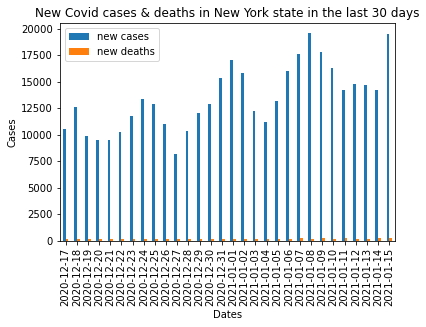

In [36]:
last_30_days_from.plot(kind='bar')
plt.title('New Covid cases & deaths in New York state in the last 30 days')
plt.xlabel('Dates')
plt.ylabel('Cases')

This graph shows that in the last 30 days cases and deaths of COVID-19 have been increasing in New York state at a much rapid pace in comparison to the begining of the pandemic. 

In [63]:
#Comparison of NY COVID cases with other states
states =['New York','Florida','Arizona','Virginia','Illinois']

In [64]:
death=pd.DataFrame(df.groupby(['state'])['deaths'].max())

In [65]:
death.nlargest(5,'deaths')

,deaths
state,
New York,25909.0
California,13489.0
Illinois,8939.0
Arizona,6340.0
Florida,4528.0


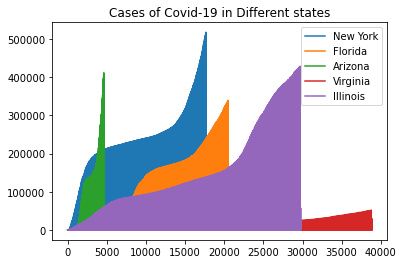

In [66]:
for s in states:
    df1=df.query(f"state == '{s}'").reset_index()
    plt.plot(df1['cases'],label=s)
plt.title('Cases of Covid-19 in Different states')
plt.legend()

Conclusion
Based of this dataset:
- New York State cases have grown at a faster pace from the last 30 days.
- It has 1,213,179 cases reported as of Jan 15/2021
- On Jan 08/2021 New York State reported it highest peak of 19560
- In comparison to other states, New York have presented the highest amount of cases and deaths as I presented in the above graph. 
